# RBM-BB 


# RBM-BG (todo)

Bernoulli - Gaussian {-1,1}

\begin{align}
q_{v} (s_i) &= \frac{1}{2} (\delta_{s_i,-1} + \delta_{s_i,1}) \\
q_{h} (\tau_i) &= \frac{1}{\sqrt{2\pi \sigma_{h}^{2}}} \exp \left( - \frac{\tau_{a}^{2}}{2\sigma_{h}^2} \right)
\end{align}

\begin{align}
p(\tau | s) \propto \prod_{a} \exp \left( -\frac{\tau_{a}^2}{2\sigma_{h}^2} + \tau_a \sum_{i} w_{ia} s_i \right)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open(mnist_test_data, 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))
print('number of test data', len(test_data_list))

number of training data 60000
number of test data 10000


## Preprocessing

In [6]:
n_data_train = 1000
n_data_val = 500
n_data_test = 500

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    x_train[i] = np.asfarray(data[1:])/255.
    
x_val = np.zeros((n_data_val, n_x))
for i, data in enumerate(training_data_list[n_data_train:n_data_train+n_data_val]):
    data = data.split(',')
    x_val[i] = np.asfarray(data[1:])/255.
    
x_test = np.zeros((n_data_test, n_x))
for i, data in enumerate(test_data_list[:n_data_test]):
    data = data.split(',')
    x_test[i] = np.asfarray(data[1:])/255.

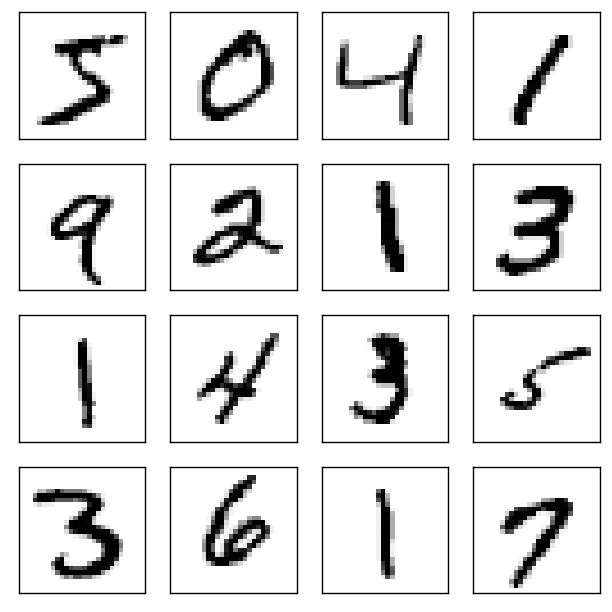

In [7]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [10]:
model = rbm.RBM(n_x,10)

In [11]:
model.fit(x_train,0.1,50)

0 0.4820426225392116
1 0.47265348688495024
2 0.4648601895660225
3 0.4560473194179631
4 0.44886478640475796
5 0.4418303326232455
6 0.43573150309143266
7 0.42880730841356146
8 0.4212856697580993
9 0.41437179420787895
10 0.4085452085736256
11 0.4013355447080793
12 0.395217417457179
13 0.3906833038117209
14 0.384630067517203
15 0.3794480747200841
16 0.37438408912584636
17 0.36925600789335356
18 0.3631683778413325
19 0.35921431121468206
20 0.35498925119067226
21 0.35007727139875544
22 0.34554545367166484
23 0.3412794022510965
24 0.3375131807625011
25 0.3334780767208844
26 0.33010642806142065
27 0.32541045467206486
28 0.32238976139475395
29 0.31861461133472996
30 0.3139791321430533
31 0.30913723038234897
32 0.305069243187471
33 0.29911565175089655
34 0.2937349794819888
35 0.28716474138675085
36 0.2807402315828292
37 0.274449805412361
38 0.26669791465605835
39 0.26072190425189695
40 0.254451035904558
41 0.24876921317546621
42 0.24374743446398164
43 0.23845253650479806
44 0.23394213734513417
4

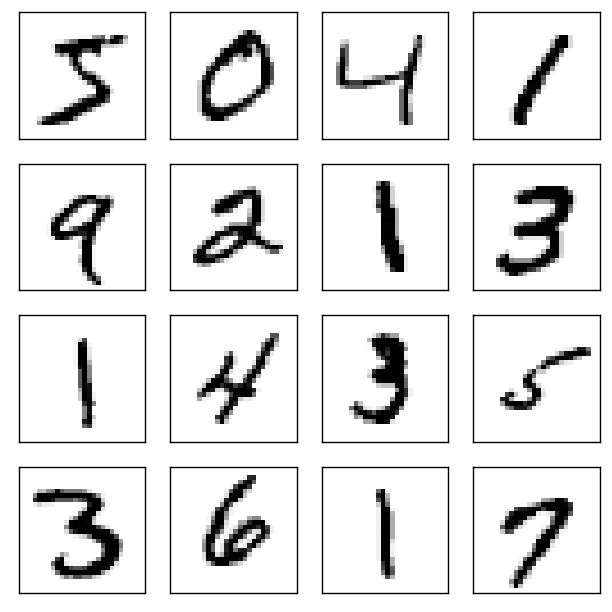

In [12]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

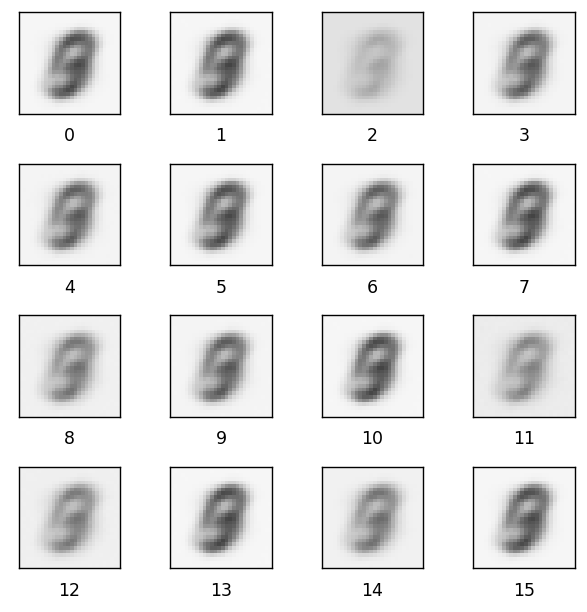

In [13]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [14]:
model.w.T[0].shape

(784,)

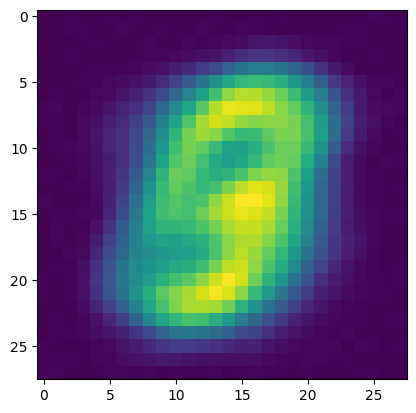

In [15]:
plt.imshow((hid[6]@model.w.T + model.a).reshape(28,28))

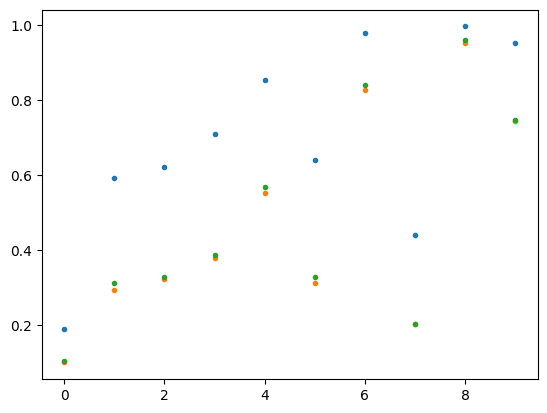

In [16]:
x = np.arange(10)
# plt.hist(hid[8])
plt.plot(x,hid[6],'.')
plt.plot(x,hid[8],'.')
plt.plot(x,hid[14],'.')

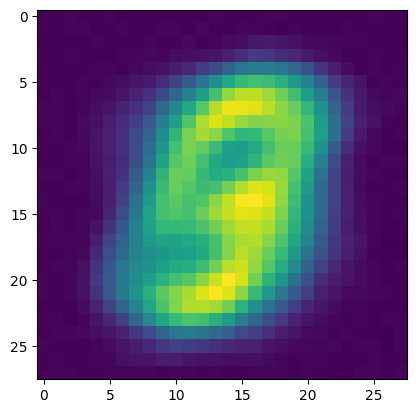

In [17]:
plt.imshow((hid[5]@model.w.T + model.a).reshape(28,28))

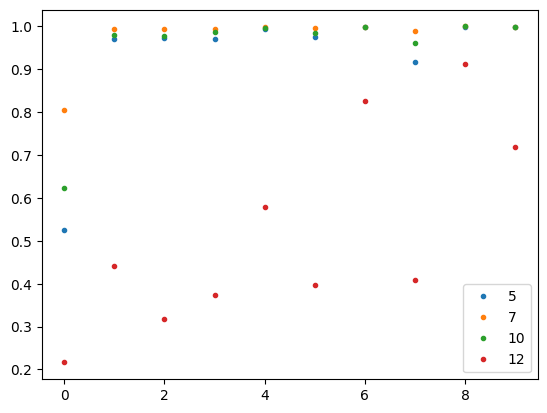

In [18]:
x = np.arange(10)
plt.plot(x,hid[5],'.',label='5')
plt.plot(x,hid[7],'.',label='7')
plt.plot(x,hid[10],'.',label='10')
plt.plot(x,hid[12],'.',label='12')
plt.legend()

In [19]:
model.w.shape

(784, 10)

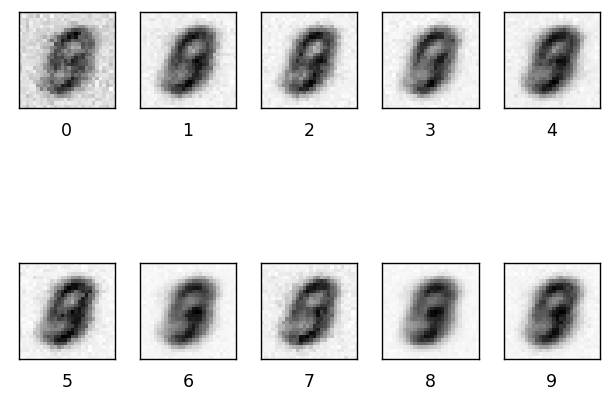

In [20]:
# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [21]:
np.log(784)

6.664409020350408

In [22]:
hid[0]

array([0.47933857, 0.93959498, 0.9287913 , 0.94728058, 0.98340915,
       0.9356885 , 0.99736994, 0.88394561, 0.99942378, 0.9931577 ])

In [23]:
model.w

array([[-0.04431804, -0.10496978, -0.09904016, ..., -0.0873855 ,
        -0.19262478, -0.14814132],
       [-0.04495034, -0.08013121, -0.10531083, ..., -0.07984712,
        -0.21708216, -0.14326621],
       [-0.03508285, -0.09371523, -0.09116462, ..., -0.06896068,
        -0.19698171, -0.16378273],
       ...,
       [-0.02525731, -0.08169937, -0.08734285, ..., -0.08266418,
        -0.21215848, -0.16420226],
       [-0.04894742, -0.09690573, -0.09798404, ..., -0.07164758,
        -0.22522344, -0.16119793],
       [-0.03168326, -0.09341554, -0.07952516, ..., -0.06390641,
        -0.20659699, -0.15423225]])

# Feature retrieving

0 0.48074475839355335
1 0.4727494202582996
2 0.4648419972891116
3 0.4567019962887114
4 0.4493126905664227


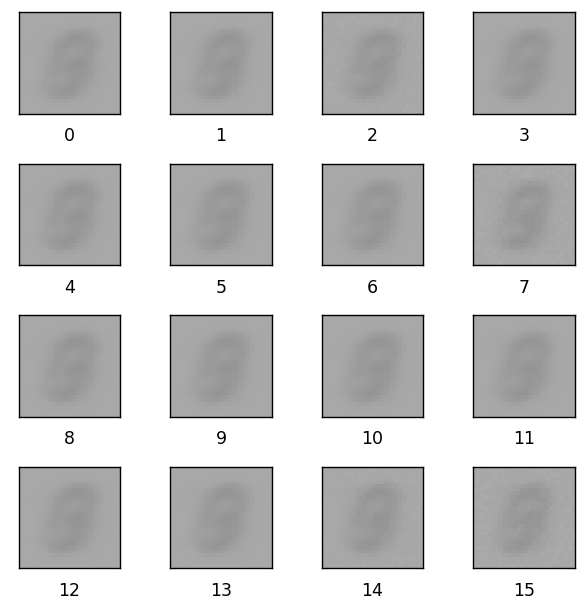

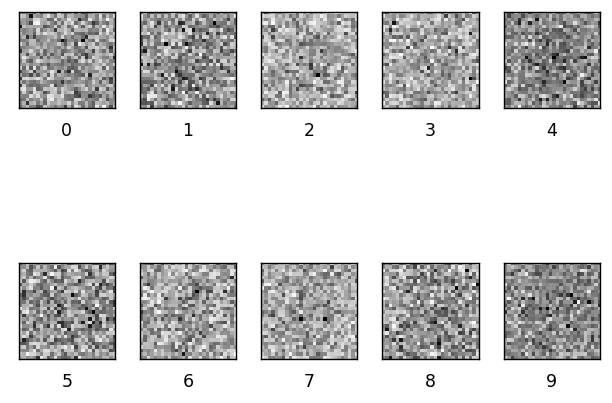

In [25]:
# Not trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,5)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

0 0.481057438465582
1 0.47289507852160473
2 0.46459269256722296
3 0.45692297468006804
4 0.4493475194979954
5 0.4414060579133615
6 0.4353677025712246
7 0.4279776865648222
8 0.42162058872568625
9 0.4142836139357702
10 0.40762980741316146
11 0.4016015311026373
12 0.396032493487591
13 0.389464331222685
14 0.384970148549616
15 0.37839511353561056
16 0.3742263160166027
17 0.3699526815628212
18 0.36428386903781124
19 0.3591573084135616
20 0.3549273914467747
21 0.3490663520310084
22 0.34677995247118437
23 0.34157339484813526
24 0.33741441625669877
25 0.33370756351560227
26 0.3293446333435337
27 0.3259532417869108
28 0.3218495503103202
29 0.31890497247918775
30 0.3143454136556584
31 0.3104939880854302
32 0.3080661719589796
33 0.3023043472290878
34 0.29690988944597446
35 0.2885672423871509
36 0.28204073178290917
37 0.2739937479893918
38 0.26650531761724305
39 0.25916603690495804
40 0.25371783762524613
41 0.24666122998218906
42 0.24141786763725098
43 0.23709574878971204
44 0.2328106997701041
45 0

352 0.13072823678491005
353 0.13077986243517012
354 0.13105254650879958
355 0.13144679420787925
356 0.13106880801340146
357 0.13086750249119256
358 0.13027264955001605
359 0.13080211133472996
360 0.13082231441596248
361 0.130242667557219
362 0.13053345387174478
363 0.130285304612041
364 0.13038501449599443
365 0.13007010353160878
366 0.1296817131754663
367 0.13006118496418184
368 0.12960307672088447
369 0.1295952335836296
370 0.1297103996500561
371 0.12955481241516212
372 0.1297824434675831
373 0.12994380801340147
374 0.12975667816146064
375 0.1290916771610605
376 0.12906386603661074
377 0.12958439924989607
378 0.12925875899379355
379 0.1292412719989956
380 0.12885992946198083
381 0.12933566975809935
382 0.12882223938595044
383 0.12924057171888362
384 0.12867087884173276
385 0.12876773258322938
386 0.12904986543637062
387 0.12852796167486602
388 0.12910321177490608
389 0.12895265655281715
390 0.12836709732912774
391 0.12852104390775915
392 0.12859204230711888
393 0.1286033718389316
394

698 0.11769026659683482
699 0.117756393047415
700 0.11718016755721894
701 0.11768422918186883
702 0.1177912770009965
703 0.11783277359963594
704 0.11758953130271715
705 0.11769594886974397
706 0.11777277460003609
707 0.1174419622751061
708 0.11775930921388165
709 0.11748037263925176
710 0.11715997948198889
711 0.11747401509623455
712 0.11753453430391762
713 0.11718316875769912
714 0.11714177219907573
715 0.11737254951000009
716 0.11754760953400965
717 0.11701122498018814
718 0.11704539864965595
719 0.11722518556442188
720 0.11697678620467798
721 0.11764745947398572
722 0.11703460933392966
723 0.11685857391976394
724 0.11756833782532618
725 0.11672909712904772
726 0.11737305971408167
727 0.11724162714105248
728 0.11702904710903976
729 0.11672025359163277
730 0.11754677419987603
731 0.11678186323549028
732 0.11699494846958391
733 0.11683997648078838
734 0.11686370597258519
735 0.11686675219107245
736 0.1167167571930733
737 0.11661484142676677
738 0.11669439324749512
739 0.116483809013801

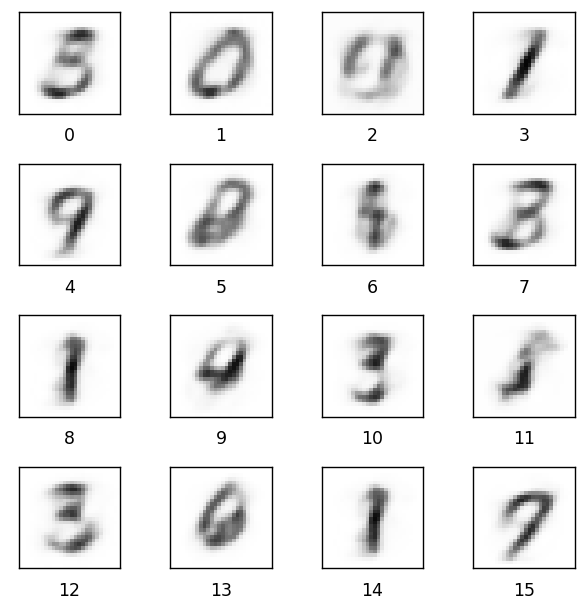

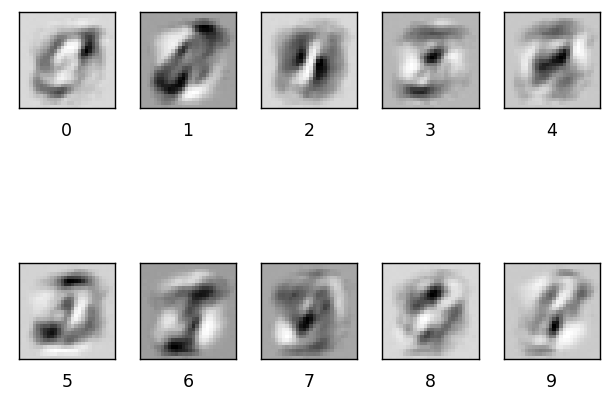

In [27]:
# Mid trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,500)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# Not all patterns are learned

In [ ]:
# Well trained

model = RBM(n_x,10)
model.fit(x_train,0.1,3000)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

0 1.1104324034515767
1 1.1111372653963552
2 1.1133490701182434
3 1.1138512509905925
4 1.1147405066928733
5 1.116955932863342
6 1.1173091941678628
7 1.1189622153763463
8 1.1186943882454945
9 1.1190712189777872
10 1.1184746803623413
11 1.118622199369944
12 1.1157359648761462
13 1.113963635944574
14 1.108512335424366
15 1.099797169357939
16 1.0906380457084794
17 1.0814505307024769
18 1.0745115951282473
19 1.0694164970890307
20 1.0684844242599
21 1.06416473638475
22 1.0610491701582594
23 1.058524580322325
24 1.055807193367543
25 1.0522441281414523
26 1.051869418257499
27 1.0482501705584193
28 1.046008253791713
29 1.0444298224191633
30 1.0426251405464144
31 1.0409037519909923
32 1.039134664355938
33 1.0356793222190837
34 1.0341577735996361
35 1.0324393462286874
36 1.0311936879653827
37 1.0304930477092795
38 1.0275977896060384
39 1.0262315431074391
40 1.0247175174971948
41 1.024612475480388
42 1.0225970693179236
43 1.0206666771610604
44 1.0203482497901124
45 1.0189629956884718
46 1.018359774

In [ ]:
sigh = sigmoid(x_train[0:1] @ model.w  + model.b)

In [ ]:
sigh

In [ ]:
N = x_train[0].shape[0]
m = (x_train[0] @ model.w)/N

In [ ]:
m

In [ ]:
sig = model._sample(x_train[0])*2 - 1

In [ ]:
(sig @ model.w)/N